Reference

1. [Detailed Explanation and Python Implementation of Q-Learning Algorithm in OpenAI Gym (Cart-Pole)](https://www.youtube.com/watch?v=KMjQmG5Uzis)


### Basic Imports

https://www.gymlibrary.dev/environments/classic_control/mountain_car/

In [1]:
import matplotlib.pyplot as plt
import torch
import gymnasium as gym
import pandas as pd

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
env = gym.make('MountainCar-v0', render_mode='human')

In [3]:
env.reset(seed=42)
for i in range(100):
    env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, observation, reward, terminated, truncated, info)
    if terminated:
        break
    

0 [-0.44679132 -0.00158252] -1.0 False False {}
1 [-0.4499448  -0.00315349] -1.0 False False {}
2 [-0.4536462  -0.00370141] -1.0 False False {}
3 [-0.45886844 -0.00522221] -1.0 False False {}
4 [-0.4645731  -0.00570465] -1.0 False False {}
5 [-0.4697181  -0.00514503] -1.0 False False {}
6 [-0.4742655  -0.00454738] -1.0 False False {}
7 [-0.47918153 -0.00491603] -1.0 False False {}
8 [-0.4844297  -0.00524817] -1.0 False False {}
9 [-0.49097094 -0.00654126] -1.0 False False {}
10 [-0.49775654 -0.00678558] -1.0 False False {}
11 [-0.5037357  -0.00597921] -1.0 False False {}
12 [-0.51086384 -0.00712809] -1.0 False False {}
13 [-0.5170874  -0.00622358] -1.0 False False {}
14 [-0.52235985 -0.00527241] -1.0 False False {}
15 [-0.52764153 -0.0052817 ] -1.0 False False {}
16 [-0.5318929  -0.00425138] -1.0 False False {}
17 [-0.5350821  -0.00318918] -1.0 False False {}
18 [-0.5381852  -0.00310308] -1.0 False False {}
19 [-0.5401789  -0.00199371] -1.0 False False {}
20 [-0.5420483  -0.00186941] -

In [4]:
nbins_pos = 3
nbins_vel = 3

pos_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], nbins_pos)
vel_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], nbins_vel)

In [5]:
pos_bins, vel_bins

(array([-1.20000005, -0.30000001,  0.60000002]), array([-0.07,  0.  ,  0.07]))

In [6]:
# Create a Q-table in pandas with multi-index
# index in the form of (pos, vel)
# columns are the actions
n_actions = env.action_space.n


# Create labels for bins with desired format
pos_labels = [f'{pos1:.2f} < pos < {pos2:.2f}' for pos1, pos2 in zip(pos_bins[:-1], pos_bins[1:])]
vel_labels = [f'{vel1:.2f} < vel < {vel2:.2f}' for vel1, vel2 in zip(vel_bins[:-1], vel_bins[1:])]

# Create MultiIndex for the Q-table
index = pd.MultiIndex.from_product([pos_labels, vel_labels], names=['pos', 'vel'])



columns = range(n_actions)

# Create Q-table with MultiIndex
q_table = pd.DataFrame(0, index=index, columns=columns)

In [7]:
q_table

0  1  2
pos                 vel                        
-1.20 < pos < -0.30 -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
-0.30 < pos < 0.60  -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0

In [8]:
pos_bins

array([-1.20000005, -0.30000001,  0.60000002])

In [9]:
# adding -inft to the first and +inft to the last bin
pos_bins = np.concatenate([[-np.inf], pos_bins, [np.inf]])
vel_bins = np.concatenate([[-np.inf], vel_bins, [np.inf]])

# Create labels for bins with desired format
pos_labels = [f'{pos1:.2f} < pos < {pos2:.2f}' for pos1, pos2 in zip(pos_bins[:-1], pos_bins[1:])]
vel_labels = [f'{vel1:.2f} < vel < {vel2:.2f}' for vel1, vel2 in zip(vel_bins[:-1], vel_bins[1:])]


# Create MultiIndex for the Q-table
index = pd.MultiIndex.from_product([pos_labels, vel_labels], names=['pos', 'vel'])



columns = range(n_actions)

# Create Q-table with MultiIndex
q_table = pd.DataFrame(0, index=index, columns=columns)

In [10]:
q_table

0  1  2
pos                 vel                        
-inf < pos < -1.20  -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0
-1.20 < pos < -0.30 -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0
-0.30 < pos < 0.60  -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0
0.60 < pos < inf    -inf < vel < -0.07  0  0  0
                    -0.07 < vel < 0.00  0  0  0
                    0.00 < vel < 0.07   0  0  0
                    0.07 < vel < inf    0  0  0

In [11]:
pos_bins[1:-1]

array([-1.20000005, -0.30000001,  0.60000002])

In [12]:
np.digitize([-1.3, -1.20, -1.1, 0.6, 5.0], pos_bins[1:-1])

array([0, 1, 1, 2, 3])

In [13]:
# Usually, we will create1a the multi-dim array in numpy

# Create a Q-table in numpy
q_table_np = np.arange(nbins_pos * nbins_vel * n_actions).reshape(nbins_pos, nbins_vel, n_actions)
print(q_table_np.shape)

(3, 3, 3)


In [14]:
q_table_np

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [15]:
def discretize_pos(pos):
    return np.digitize(pos, pos_bins[1:-1])

def discretize_vel(vel):
    return np.digitize(vel, vel_bins[1:-1])

from ipywidgets import interact

@interact(pos=(-1.3, 0.9, 0.01), vel=(-0.08, 0.09, 0.01))
def show_discretize(pos, vel):
    print(f"Position index {discretize_pos(pos)}, Velocity index {discretize_vel(vel)}, Value: {q_table_np[discretize_pos(pos), discretize_vel(vel)]}")


interactive(children=(FloatSlider(value=-0.19999999999999996, description='pos', max=0.9, min=-1.3, step=0.01)…

In [16]:
# Use untrained Q-table to play the game

observation,  _  = env.reset(seed=42)

for i in range(100):
    env.render()
    pos, vel = observation
    pos_idx = discretize_pos(pos)
    vel_idx = discretize_vel(vel)
    action = np.argmax(q_table_np[pos_idx, vel_idx])
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, observation, reward, terminated, truncated, info, action)
    if terminated:
        break
    

0 [-4.4479132e-01  4.1747934e-04] -1.0 False False {} 2
1 [-0.4439594   0.00083191] -1.0 False False {} 2
2 [-0.4427191   0.00124029] -1.0 False False {} 2
3 [-0.4410795   0.00163962] -1.0 False False {} 2
4 [-0.43905246  0.00202703] -1.0 False False {} 2
5 [-0.43665275  0.00239971] -1.0 False False {} 2
6 [-0.43389776  0.00275498] -1.0 False False {} 2
7 [-0.43080744  0.00309032] -1.0 False False {} 2
8 [-0.4274041   0.00340333] -1.0 False False {} 2
9 [-0.42371225  0.00369185] -1.0 False False {} 2
10 [-0.4197584   0.00395386] -1.0 False False {} 2
11 [-0.41557083  0.00418759] -1.0 False False {} 2
12 [-0.41117933  0.00439149] -1.0 False False {} 2
13 [-0.40661508  0.00456424] -1.0 False False {} 2
14 [-0.40191033  0.00470476] -1.0 False False {} 2
15 [-0.3970981   0.00481224] -1.0 False False {} 2
16 [-0.392212    0.00488609] -1.0 False False {} 2
17 [-0.38728598  0.00492601] -1.0 False False {} 2
18 [-0.38235408  0.00493192] -1.0 False False {} 2
19 [-0.37745008  0.004904  ] -1.0 F

In [28]:
# Train the Q-table

# Hyperparameters
alpha = 0.2 # learning rate
gamma = 0.99 # discount factor

# Exploration settings
epsilon = 0.4 # exploration rate

# Number of episodes
n_episodes = 2000

# Number of steps per episode
n_steps = 300

# Create a Q-table in numpy
nbins_pos = 20
nbins_vel = 20

pos_bins = np.linspace(env.observation_space.low[0], env.observation_space.high[0], nbins_pos)
vel_bins = np.linspace(env.observation_space.low[1], env.observation_space.high[1], nbins_vel)

pos_bins = np.concatenate([[-np.inf], pos_bins, [np.inf]])
vel_bins = np.concatenate([[-np.inf], vel_bins, [np.inf]])

q_table_np = np.random.randn(nbins_pos, nbins_vel, n_actions)

def discretize_pos(pos):
    return np.digitize(pos, pos_bins[1:-1])

def discretize_vel(vel):
    return np.digitize(vel, vel_bins[1:-1])
    

In [29]:
# loop
# disable rendering
env = gym.make('MountainCar-v0', render_mode=None)
rewards = np.zeros(n_episodes)
for episode in range(n_episodes):
    epsilon = epsilon * 0.98
    if episode % 100 == 0:
        print(f"Episode {episode}")
    observation, _ = env.reset(seed=episode)
    cumulative_reward = 0
    for step in range(n_steps):
        # discretize the observation
        pos, vel = observation
        pos_idx = discretize_pos(pos)
        vel_idx = discretize_vel(vel)
        
        # select the action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table_np[pos_idx, vel_idx])
        
        # take the action
        next_observation, reward, terminated, truncated, info = env.step(action)
        
        cumulative_reward += reward
        # discretize the next observation
        next_pos, next_vel = next_observation
        next_pos_idx = discretize_pos(next_pos)
        next_vel_idx = discretize_vel(next_vel)
        
        # update the q-table
        q_table_np[pos_idx, vel_idx, action] += alpha * (reward + gamma * np.max(q_table_np[next_pos_idx, next_vel_idx]) - q_table_np[pos_idx, vel_idx, action])
        
        observation = next_observation
        # rewards update
        rewards[episode] = cumulative_reward
        
        if terminated:
            print(f"Episode {episode} terminated after {step} steps")
            break

Episode 0
Episode 100
Episode 104 terminated after 252 steps
Episode 114 terminated after 287 steps
Episode 116 terminated after 277 steps
Episode 118 terminated after 261 steps
Episode 123 terminated after 297 steps
Episode 200
Episode 215 terminated after 259 steps
Episode 216 terminated after 253 steps
Episode 218 terminated after 255 steps
Episode 220 terminated after 171 steps
Episode 222 terminated after 215 steps
Episode 224 terminated after 224 steps
Episode 225 terminated after 168 steps
Episode 226 terminated after 251 steps
Episode 230 terminated after 283 steps
Episode 241 terminated after 287 steps
Episode 242 terminated after 210 steps
Episode 243 terminated after 255 steps
Episode 245 terminated after 240 steps
Episode 250 terminated after 277 steps
Episode 259 terminated after 237 steps
Episode 280 terminated after 292 steps
Episode 283 terminated after 244 steps
Episode 284 terminated after 238 steps
Episode 285 terminated after 274 steps
Episode 286 terminated after 2

In [30]:
q_table_np

array([[[ 1.30432366e+00, -2.28189165e-01, -7.14561297e-02],
        [ 3.37826417e-01,  7.61583508e-01, -1.44884655e+00],
        [-1.52782796e+00,  9.73074342e-01,  1.60619318e-01],
        ...,
        [ 9.73927257e-02,  1.61677037e-01, -6.12097574e-02],
        [ 2.87128008e-01, -3.42258014e-01,  3.39901955e-01],
        [-1.11096611e+00,  1.02537711e+00, -1.43006898e+00]],

       [[-2.52565204e-01,  3.97647020e-04,  3.42780743e-02],
        [-3.53066775e-01,  2.44357719e-01,  1.03255669e-01],
        [-1.44658827e+01, -1.62456830e+01, -1.74231972e+01],
        ...,
        [-2.19675207e+00, -8.02419463e-02,  2.22125945e+00],
        [ 7.28737715e-02,  3.53789814e-01, -4.17615617e-01],
        [-1.49266746e+00,  1.55409255e+00,  1.53444016e+00]],

       [[ 2.41248624e-01,  1.25862122e+00,  9.08946619e-01],
        [ 2.05251191e-01, -2.75857743e-02, -8.79121108e-01],
        [-3.59169112e+01, -3.60513173e+01, -3.58445981e+01],
        ...,
        [ 1.76035339e+00,  1.46364040e+00,

<Axes: >

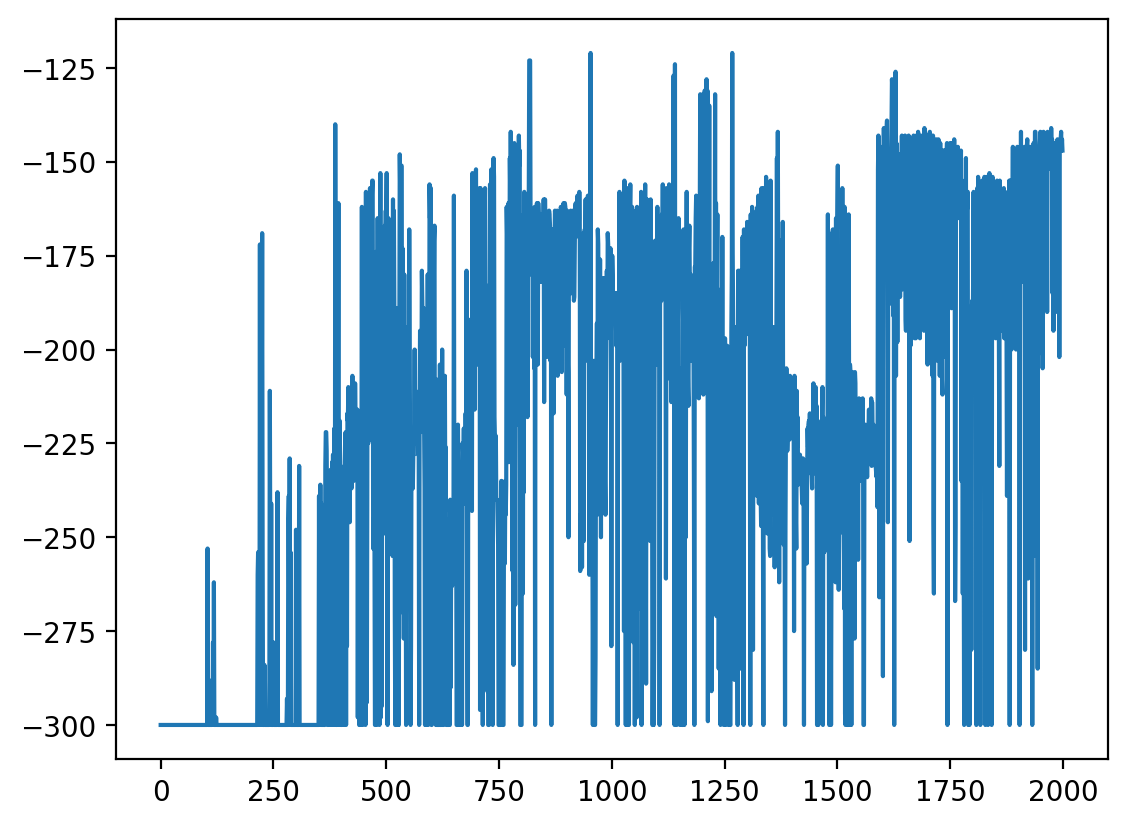

In [31]:
pd.Series(rewards).plot()

<Axes: >

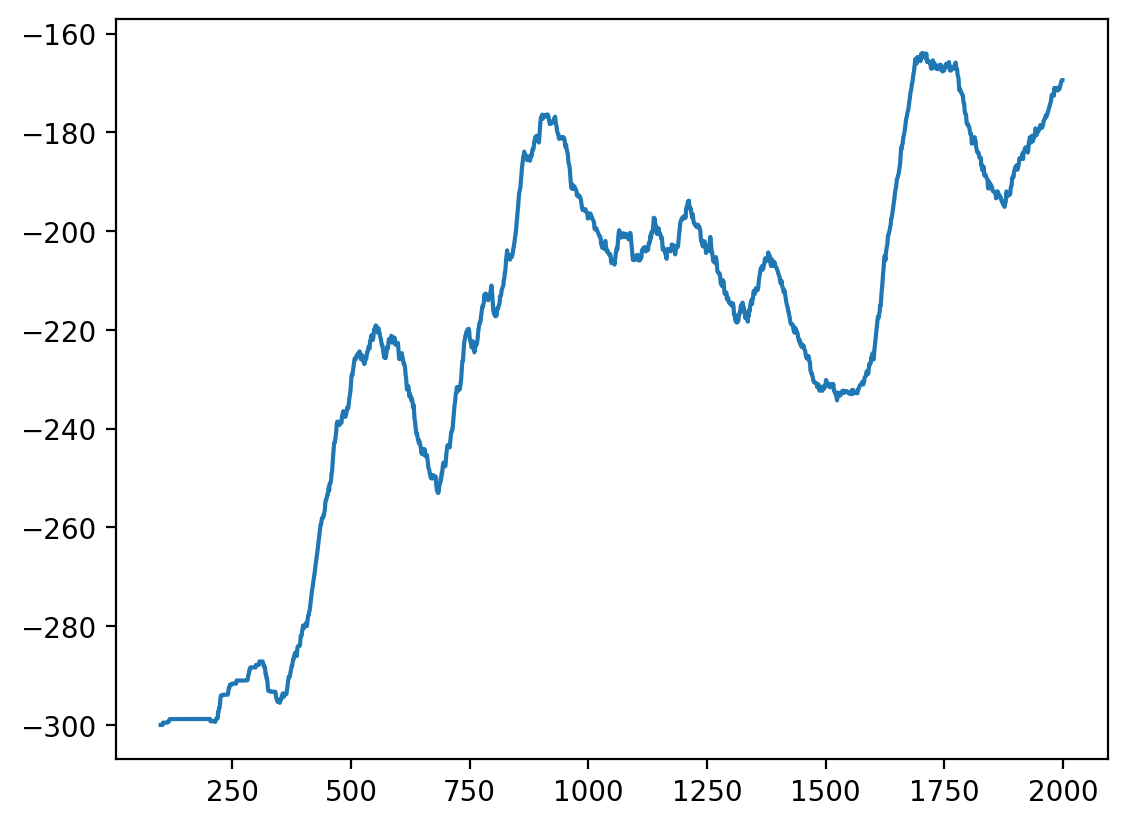

In [32]:
# plot smoothed rewards
pd.Series(rewards).rolling(100).mean().plot()

In [33]:
env = gym.make('MountainCar-v0', render_mode='human')
observation,  _  = env.reset(seed=42)

for i in range(300):
    env.render()
    pos, vel = observation
    pos_idx = discretize_pos(pos)
    vel_idx = discretize_vel(vel)
    action = np.argmax(q_table_np[pos_idx, vel_idx])
    observation, reward, terminated, truncated, info = env.step(action)
    print(i, observation, reward, terminated, truncated, info, action)
    if terminated:
        break

0 [-0.44679132 -0.00158252] -1.0 False False {} 0
1 [-0.4499448  -0.00315349] -1.0 False False {} 0
2 [-0.45464623 -0.00470141] -1.0 False False {} 0
3 [-0.4608611  -0.00621488] -1.0 False False {} 0
4 [-0.46854374 -0.00768264] -1.0 False False {} 0
5 [-0.4776374  -0.00909367] -1.0 False False {} 0
6 [-0.4880747  -0.01043729] -1.0 False False {} 0
7 [-0.4997779  -0.01170322] -1.0 False False {} 0
8 [-0.51265967 -0.01288173] -1.0 False False {} 0
9 [-0.52662337 -0.01396375] -1.0 False False {} 0
10 [-0.54156446 -0.01494107] -1.0 False False {} 0
11 [-0.55737084 -0.01580639] -1.0 False False {} 0
12 [-0.5739244  -0.01655353] -1.0 False False {} 0
13 [-0.59110194 -0.01717752] -1.0 False False {} 0
14 [-0.6087766 -0.0176747] -1.0 False False {} 0
15 [-0.62681943 -0.0180428 ] -1.0 False False {} 0
16 [-0.64510036 -0.01828096] -1.0 False False {} 0
17 [-0.6634901  -0.01838974] -1.0 False False {} 0
18 [-0.6818612  -0.01837108] -1.0 False False {} 0
19 [-0.7000894  -0.01822821] -1.0 False Fal

Reference: https://omarelb.github.io/dqn-investigation/

In [41]:
# Deep Q-learning


class QNetwork(torch.nn.Module):
    def __init__(self, n_inputs, n_outputs, n_hidden=128):
        super(QNetwork, self).__init__()
        self.fc1 = torch.nn.Linear(n_inputs, n_hidden)
        self.fc2 = torch.nn.Linear(n_hidden, n_outputs)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

q_network = QNetwork(n_inputs, n_outputs)

In [42]:
q_network

QNetwork(
  (fc1): Linear(in_features=2, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [43]:
with torch.no_grad():
    q_values = q_network(torch.tensor([0.1, 0.2], dtype=torch.float32))
    print(q_values)


tensor([-0.0065,  0.1707,  0.0062])


In [44]:
# Train the Q-network

# Hyperparameters
alpha = 0.2 # learning rate
gamma = 0.99 # discount factor

# Exploration settings
epsilon = 0.2 # exploration rate
eps_mult = 0.99

# Number of episodes
n_episodes = 2000

# Number of steps per episode
n_steps = 300



In [60]:
env = gym.make('MountainCar-v0', render_mode=None)

obs, _ = env.reset(seed=42)

q_network = QNetwork(n_inputs, n_outputs)

pos, vel = obs
pos_idx = discretize_pos(pos)
vel_idx = discretize_vel(vel)
print(observation)

with torch.no_grad():
    q_values = q_network(torch.tensor([pos, vel], dtype=torch.float32))
    print(q_values)

    action = torch.argmax(q_values).item()
    print(action)

    next_observation, reward, terminated, truncated, info = env.step(action)
    print(next_observation)

    next_pos, next_vel = next_observation

    next_pos_idx = discretize_pos(next_pos)
    next_vel_idx = discretize_vel(next_vel)

    next_q_values = q_network(torch.tensor([next_pos, next_vel], dtype=torch.float32))
    print(next_q_values)

    # Compute the target
    target = reward + gamma * torch.max(next_q_values)
    print(target)

# Compute the loss
criterion = torch.nn.MSELoss()
loss = criterion(q_values[action], target)
print(loss)




[-0.68420756 -0.01730118]
tensor([ 0.1212, -0.1776,  0.1786])
2
[-4.4479132e-01  4.1747934e-04]
tensor([ 0.1211, -0.1776,  0.1787])
tensor(-0.8231)
tensor(1.0035)


In [58]:

optimizer = torch.optim.Adam(q_network.parameters(), lr=alpha)

for episode in range(n_episodes):
    epsilon = epsilon * eps_mult
    if episode % 100 == 0:
        print(f"Episode {episode}")
    observation, _ = env.reset(seed=1)
    cumulative_reward = 0
    for step in range(n_steps):
        # discretize the observation
        pos, vel = observation
        pos_idx = discretize_pos(pos)
        vel_idx = discretize_vel(vel)
        
        # select the action
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            q_values = q_network(torch.tensor([pos, vel], dtype=torch.float32))
            action = torch.argmax(q_values).item()
        
        # take the action
        next_observation, reward, terminated, truncated, info = env.step(action)
        
        cumulative_reward += reward
        # discretize the next observation
        next_pos, next_vel = next_observation
        next_pos_idx = discretize_pos(next_pos)
        next_vel_idx = discretize_vel(next_vel)
        
        # Compute Q-values for the next state
        with torch.no_grad():
            next_q_values = q_network(torch.tensor([next_pos, next_vel], dtype=torch.float32))
            max_next_q_value = torch.max(next_q_values).item()
        
        target_q_value = reward + gamma * max_next_q_value
        
        # Compute loss and update Q-network
        q_value = q_network(torch.tensor([pos, vel], dtype=torch.float32))[action]
        criterion = torch.nn.MSELoss()
        loss = criterion(q_value, torch.tensor(target_q_value, dtype=torch.float32))
        print(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        observation = next_observation
        # rewards update
        rewards[episode] = cumulative_reward

        
        if terminated:
            print(f"Episode {episode} terminated after {step} steps")
            break

Episode 0
1.0048069953918457
1.0014567375183105
0.9958764910697937
0.9182038307189941
0.8115965723991394
0.63067626953125
0.4421957731246948
0.222701296210289
0.1335132122039795
0.03360588848590851
0.0016043486539274454
0.06032954156398773
0.10956689715385437
0.08843399584293365
0.036764971911907196
0.003027551807463169
0.006071371491998434
0.03167363628745079
0.05209045484662056
0.05149663984775543
26067.0234375
0.020529165863990784
0.019284943118691444
0.01451992616057396
0.008877977728843689
0.004237228073179722
0.001369189703837037
3689.034912109375
200.40049743652344
0.0010999157093465328
2.06069671548903e-05
0.002101067453622818
0.008885168470442295
0.019762517884373665
0.03410563990473747
0.051299456506967545
0.07075944542884827
0.09196017682552338
0.11443059146404266
0.2135302722454071
1061.5845947265625
0.35540324449539185
0.4385024905204773
2.2119390964508057
0.5501630306243896
0.6136103272438049
62.149166107177734
0.7008147239685059
0.7459989786148071
0.7844885587692261
0.81

KeyboardInterrupt: 

<Axes: >

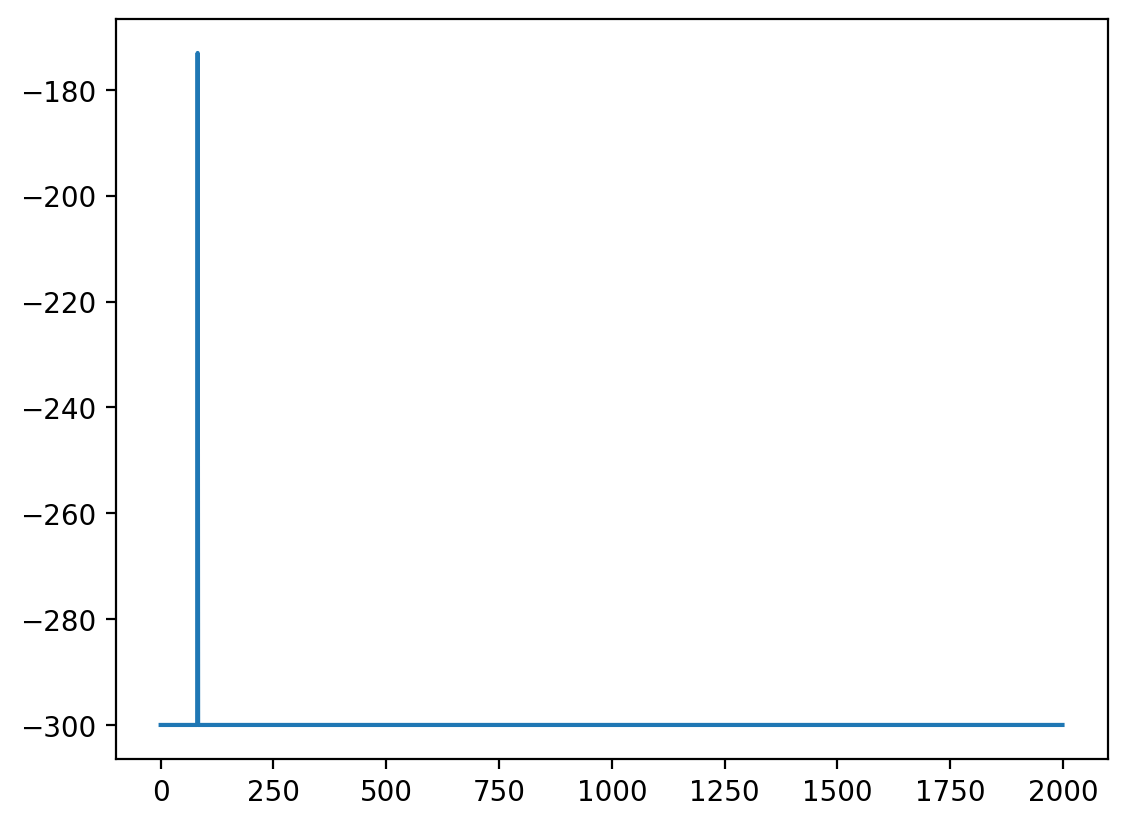

In [59]:
pd.Series(rewards).plot()